# 서울시 구별 CCTV 현황 분석하기

### 작성 : [PinkWink](http://pinkwink.kr) 

* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
* Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
* Pandas와 Matplotlib의 기본적 사용법을 확인
* 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인


In [4]:
# 구글 코랩에서 나눔폰트 설치 
# https://teddylee777.github.io/colab/colab-korean
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,308 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
# excel read 1.2.0 으로 업그레이드 
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
# colab에서 현재 작업 디렉토리를 변경 
%cd /content/drive/MyDrive/DataScience/source_code

/content/drive/MyDrive/DataScience/source_code


In [5]:
!pwd

/content/drive/MyDrive/DataScience/source_code


In [6]:
import pandas as pd

In [7]:
CCTV_Seoul = pd.read_csv('../data/01.CCTV_in_Seoul_2021.csv', encoding='cp949')
CCTV_Seoul.head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,"1,715",815,0,0,195,150,0,261,85,9,200,0
1,중 구,"2,447",16,114,87,77,236,240,372,386,155,361,403
2,용산구,"2,611",34,71,234,125,221,298,351,125,307,617,228
3,성동구,"3,829",163,144,208,107,325,255,967,415,490,472,283
4,광진구,"3,211",35,57,100,187,98,52,675,465,712,175,655


In [8]:
CCTV_Seoul.columns

Index(['구별', '총계', '2012년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년'],
      dtype='object')

In [9]:
CCTV_Seoul.columns[0]

'구별'

In [10]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,"1,715",815,0,0,195,150,0,261,85,9,200,0
1,중 구,"2,447",16,114,87,77,236,240,372,386,155,361,403
2,용산구,"2,611",34,71,234,125,221,298,351,125,307,617,228
3,성동구,"3,829",163,144,208,107,325,255,967,415,490,472,283
4,광진구,"3,211",35,57,100,187,98,52,675,465,712,175,655


## 2-2. 엑셀파일 읽기 - 서울시 인구현황

In [11]:
!pwd

/content/drive/MyDrive/DataScience/source_code


In [12]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls') # 상대경로 
pop_Seoul.head()
# /content/drive/MyDrive/DataScience/data/01. population_in_Seoul.xls 절대경로

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [13]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [14]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 3. Pandas 기초

In [15]:
import pandas as pd
import numpy as np

In [16]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [17]:
dates = pd.date_range('20220501', periods=6)
dates

DatetimeIndex(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04',
               '2022-05-05', '2022-05-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, 
                  columns=['A','B','C','D'])
df

,A,B,C,D
2022-05-01,-0.583190,2.265394,0.654575,1.497104
2022-05-02,0.616498,1.143543,0.241101,-0.034024
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239
2022-05-04,-0.110505,0.379502,-0.222423,0.964423
2022-05-05,1.203053,1.244058,0.177678,0.201061
2022-05-06,-0.713062,0.766792,-0.054094,-1.007134


In [19]:
df.head()

,A,B,C,D
2022-05-01,-0.583190,2.265394,0.654575,1.497104
2022-05-02,0.616498,1.143543,0.241101,-0.034024
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239
2022-05-04,-0.110505,0.379502,-0.222423,0.964423
2022-05-05,1.203053,1.244058,0.177678,0.201061


In [20]:
df.head(3)

,A,B,C,D
2022-05-01,-0.583190,2.265394,0.654575,1.497104
2022-05-02,0.616498,1.143543,0.241101,-0.034024
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239


In [21]:
df.index

DatetimeIndex(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04',
               '2022-05-05', '2022-05-06'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [23]:
df.values

array([[-0.58318991,  2.26539366,  0.6545751 ,  1.49710354],
       [ 0.61649758,  1.14354293,  0.24110055, -0.03402443],
       [ 0.48402582, -0.40278133, -0.66753218, -0.31823887],
       [-0.11050482,  0.3795016 , -0.2224234 ,  0.96442284],
       [ 1.20305278,  1.24405811,  0.177678  ,  0.20106111],
       [-0.71306219,  0.7667925 , -0.05409356, -1.00713397]])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2022-05-01 to 2022-05-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [25]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.149470,0.899418,0.021551,0.217198
std,0.746782,0.897540,0.450195,0.899506
min,-0.713062,-0.402781,-0.667532,-1.007134
25%,-0.465019,0.476324,-0.180341,-0.247185
50%,0.186761,0.955168,0.061792,0.083518
75%,0.583380,1.218929,0.225245,0.773582
max,1.203053,2.265394,0.654575,1.497104


In [26]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2022-05-01,-0.583190,2.265394,0.654575,1.497104
2022-05-05,1.203053,1.244058,0.177678,0.201061
2022-05-02,0.616498,1.143543,0.241101,-0.034024
2022-05-06,-0.713062,0.766792,-0.054094,-1.007134
2022-05-04,-0.110505,0.379502,-0.222423,0.964423
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239


In [27]:
df

,A,B,C,D
2022-05-01,-0.583190,2.265394,0.654575,1.497104
2022-05-02,0.616498,1.143543,0.241101,-0.034024
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239
2022-05-04,-0.110505,0.379502,-0.222423,0.964423
2022-05-05,1.203053,1.244058,0.177678,0.201061
2022-05-06,-0.713062,0.766792,-0.054094,-1.007134


In [28]:
df['A']

2022-05-01   -0.583190
2022-05-02    0.616498
2022-05-03    0.484026
2022-05-04   -0.110505
2022-05-05    1.203053
2022-05-06   -0.713062
Freq: D, Name: A, dtype: float64

In [29]:
df[0:3]

,A,B,C,D
2022-05-01,-0.583190,2.265394,0.654575,1.497104
2022-05-02,0.616498,1.143543,0.241101,-0.034024
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239


In [30]:
df['20220502':'20220504']

,A,B,C,D
2022-05-02,0.616498,1.143543,0.241101,-0.034024
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239
2022-05-04,-0.110505,0.379502,-0.222423,0.964423


In [31]:
df.loc[dates[0]]

A   -0.583190
B    2.265394
C    0.654575
D    1.497104
Name: 2022-05-01 00:00:00, dtype: float64

In [32]:
df.loc[:,['A','B']]

,A,B
2022-05-01,-0.583190,2.265394
2022-05-02,0.616498,1.143543
2022-05-03,0.484026,-0.402781
2022-05-04,-0.110505,0.379502
2022-05-05,1.203053,1.244058
2022-05-06,-0.713062,0.766792


In [33]:
df.loc['20220502',['A','B']]

A    0.616498
B    1.143543
Name: 2022-05-02 00:00:00, dtype: float64

In [34]:
df.loc[dates[0],'A']

-0.5831899070437825

In [35]:
df.iloc[3]

A   -0.110505
B    0.379502
C   -0.222423
D    0.964423
Name: 2022-05-04 00:00:00, dtype: float64

In [36]:
df.iloc[3:5,0:2]

,A,B
2022-05-04,-0.110505,0.379502
2022-05-05,1.203053,1.244058


In [37]:
df.iloc[[1,2,4],[0,2]]

,A,C
2022-05-02,0.616498,0.241101
2022-05-03,0.484026,-0.667532
2022-05-05,1.203053,0.177678


In [38]:
df.iloc[1:3,:]

,A,B,C,D
2022-05-02,0.616498,1.143543,0.241101,-0.034024
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239


In [39]:
df.iloc[:,1:3]

,B,C
2022-05-01,2.265394,0.654575
2022-05-02,1.143543,0.241101
2022-05-03,-0.402781,-0.667532
2022-05-04,0.379502,-0.222423
2022-05-05,1.244058,0.177678
2022-05-06,0.766792,-0.054094


In [40]:
df

,A,B,C,D
2022-05-01,-0.583190,2.265394,0.654575,1.497104
2022-05-02,0.616498,1.143543,0.241101,-0.034024
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239
2022-05-04,-0.110505,0.379502,-0.222423,0.964423
2022-05-05,1.203053,1.244058,0.177678,0.201061
2022-05-06,-0.713062,0.766792,-0.054094,-1.007134


In [41]:
df[df.A > 0]

,A,B,C,D
2022-05-02,0.616498,1.143543,0.241101,-0.034024
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239
2022-05-05,1.203053,1.244058,0.177678,0.201061


In [42]:
df[df > 0]

,A,B,C,D
2022-05-01,NaN,2.265394,0.654575,1.497104
2022-05-02,0.616498,1.143543,0.241101,NaN
2022-05-03,0.484026,NaN,NaN,NaN
2022-05-04,NaN,0.379502,NaN,0.964423
2022-05-05,1.203053,1.244058,0.177678,0.201061
2022-05-06,NaN,0.766792,NaN,NaN


In [43]:
df2 = df.copy()

In [44]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2022-05-01,-0.583190,2.265394,0.654575,1.497104,one
2022-05-02,0.616498,1.143543,0.241101,-0.034024,one
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239,two
2022-05-04,-0.110505,0.379502,-0.222423,0.964423,three
2022-05-05,1.203053,1.244058,0.177678,0.201061,four
2022-05-06,-0.713062,0.766792,-0.054094,-1.007134,three


In [45]:
df2['E'].isin(['two','four'])

2022-05-01    False
2022-05-02    False
2022-05-03     True
2022-05-04    False
2022-05-05     True
2022-05-06    False
Freq: D, Name: E, dtype: bool

In [46]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239,two
2022-05-05,1.203053,1.244058,0.177678,0.201061,four


In [47]:
df

,A,B,C,D
2022-05-01,-0.583190,2.265394,0.654575,1.497104
2022-05-02,0.616498,1.143543,0.241101,-0.034024
2022-05-03,0.484026,-0.402781,-0.667532,-0.318239
2022-05-04,-0.110505,0.379502,-0.222423,0.964423
2022-05-05,1.203053,1.244058,0.177678,0.201061
2022-05-06,-0.713062,0.766792,-0.054094,-1.007134


In [48]:
df.apply(np.cumsum)

,A,B,C,D
2022-05-01,-0.583190,2.265394,0.654575,1.497104
2022-05-02,0.033308,3.408937,0.895676,1.463079
2022-05-03,0.517334,3.006155,0.228143,1.144840
2022-05-04,0.406829,3.385657,0.005720,2.109263
2022-05-05,1.609881,4.629715,0.183398,2.310324
2022-05-06,0.896819,5.396507,0.129305,1.303190


In [49]:
df.apply(lambda x: x.max() - x.min())

A    1.916115
B    2.668175
C    1.322107
D    2.504238
dtype: float64

# 4. CCTV 데이터 파악하기

In [50]:
CCTV_Seoul.head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,"1,715",815,0,0,195,150,0,261,85,9,200,0
1,중 구,"2,447",16,114,87,77,236,240,372,386,155,361,403
2,용산구,"2,611",34,71,234,125,221,298,351,125,307,617,228
3,성동구,"3,829",163,144,208,107,325,255,967,415,490,472,283
4,광진구,"3,211",35,57,100,187,98,52,675,465,712,175,655


In [51]:
CCTV_Seoul.sort_values(by='총계', ascending=True)

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,"1,715",815,0,0,195,150,0,261,85,9,200,0
9,도봉구,"1,930",128,22,2,145,172,123,129,222,210,184,593
19,동작구,"2,306",41,24,25,503,128,253,271,300,322,419,20
17,금천구,"2,411",0,0,174,80,361,133,196,539,367,513,48
1,중 구,"2,447",16,114,87,77,236,240,372,386,155,361,403
10,노원구,"2,492",0,87,164,77,514,331,175,216,320,387,221
13,마포구,"2,496",23,19,40,112,185,478,365,373,494,299,108
2,용산구,"2,611",34,71,234,125,221,298,351,125,307,617,228
5,동대문구,"2,628",4,0,14,16,115,804,814,201,218,223,219
15,강서구,"2,744",54,122,104,202,199,168,506,259,457,356,317


In [52]:
CCTV_Seoul.sort_values(by='총계', ascending=False).head(5)

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
22,강남구,"6,871",69,67,66,580,830,1293,988,745,791,926,516
20,관악구,"5,149",440,84,431,439,609,622,688,674,595,331,236
16,구로구,"4,608",852,216,349,187,268,326,540,488,434,415,533
7,성북구,"4,602",81,78,170,229,322,594,890,867,714,253,404
11,은평구,"4,131",14,3,44,332,329,555,403,635,1057,288,471


In [53]:
CCTV_Seoul.sort_values(by='2021년', ascending=False)

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
4,광진구,"3,211",35,57,100,187,98,52,675,465,712,175,655
9,도봉구,"1,930",128,22,2,145,172,123,129,222,210,184,593
21,서초구,"4,082",8,73,79,70,562,504,1041,417,339,433,556
16,구로구,"4,608",852,216,349,187,268,326,540,488,434,415,533
22,강남구,"6,871",69,67,66,580,830,1293,988,745,791,926,516
11,은평구,"4,131",14,3,44,332,329,555,403,635,1057,288,471
8,강북구,"3,090",8,0,22,61,124,251,29,391,1078,656,470
6,중랑구,"3,737",346,21,253,72,132,155,153,174,1049,934,448
7,성북구,"4,602",81,78,170,229,322,594,890,867,714,253,404
1,중 구,"2,447",16,114,87,77,236,240,372,386,155,361,403


In [54]:
# 2012년 이전: 기준(분모) 값이 0이면 1로 바꿔 줌
s1 = CCTV_Seoul['2012년 이전'].replace(0,1)

In [55]:
s1.head()

0    815
1     16
2     34
3    163
4     35
Name: 2012년 이전, dtype: int64

In [56]:
# 2017년: 기준(분모), 3개년도 (test용)
# 2012년 이전: 기준(분모), 10개년도


CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2021년'] + CCTV_Seoul['2020년'] + \
                        CCTV_Seoul['2019년'] + CCTV_Seoul['2018년'] + \
                        CCTV_Seoul['2017년'] + CCTV_Seoul['2016년'] + \
                        CCTV_Seoul['2015년'] + CCTV_Seoul['2014년'] + \
                        CCTV_Seoul['2013년'] + \
                        CCTV_Seoul['2012년']) / \
                        s1  * 100

CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
10,노원구,"2,492",0,87,164,77,514,331,175,216,320,387,221,249200.0
17,금천구,"2,411",0,0,174,80,361,133,196,539,367,513,48,241100.0
5,동대문구,"2,628",4,0,14,16,115,804,814,201,218,223,219,65600.0
21,서초구,"4,082",8,73,79,70,562,504,1041,417,339,433,556,50925.0
8,강북구,"3,090",8,0,22,61,124,251,29,391,1078,656,470,38525.0


# 5. 서울시 인구 데이터 파악하기

In [57]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [58]:
pop_Seoul.drop([0], inplace=True) # 0번 행(합계) 제거
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [59]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [60]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [61]:
pop_Seoul.drop([26], inplace=True) # 26번째 행 삭제
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [62]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [63]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [64]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [65]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [66]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [67]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# 6. Pandas 고급 두 DataFrame 병합하기

In [68]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [69]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [70]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [71]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [72]:
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [73]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [74]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [75]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [76]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

In [77]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [78]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [79]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [80]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [81]:
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [82]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [83]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [84]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [85]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [86]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [87]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [88]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [89]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


# 7. CCTV 데이터와 인구 데이터 합치고 분석하기

In [90]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,"1,715",815,0,0,195,150,0,261,85,9,200,0,110.429448,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
1,용산구,"2,611",34,71,234,125,221,298,351,125,307,617,228,7579.411765,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
2,성동구,"3,829",163,144,208,107,325,255,967,415,490,472,283,2249.079755,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
3,광진구,"3,211",35,57,100,187,98,52,675,465,712,175,655,9074.285714,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
4,동대문구,"2,628",4,0,14,16,115,804,814,201,218,223,219,65600.000000,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [91]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구별        24 non-null     object 
 1   총계        24 non-null     object 
 2   2012년 이전  24 non-null     int64  
 3   2012년     24 non-null     int64  
 4   2013년     24 non-null     int64  
 5   2014년     24 non-null     int64  
 6   2015년     24 non-null     int64  
 7   2016년     24 non-null     int64  
 8   2017년     24 non-null     int64  
 9   2018년     24 non-null     int64  
 10  2019년     24 non-null     int64  
 11  2020년     24 non-null     int64  
 12  2021년     24 non-null     int64  
 13  최근증가율     24 non-null     float64
 14  인구수       24 non-null     float64
 15  한국인       24 non-null     float64
 16  외국인       24 non-null     float64
 17  고령자       24 non-null     float64
 18  외국인비율     24 non-null     float64
 19  고령자비율     24 non-null     float64
dtypes: float64(7), int64(11), object(2

In [92]:
del data_result['2012년 이전']
del data_result['2012년']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
del data_result['2019년']
del data_result['2020년']
del data_result['2021년']
data_result.head()

,구별,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,"1,715",110.429448,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
1,용산구,"2,611",7579.411765,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
2,성동구,"3,829",2249.079755,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
3,광진구,"3,211",9074.285714,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
4,동대문구,"2,628",65600.000000,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [93]:
data_result.set_index('구별', inplace=True) #'구별'을 idx 설정
data_result

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,"1,715",110.429448,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
용산구,"2,611",7579.411765,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
성동구,"3,829",2249.079755,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
광진구,"3,211",9074.285714,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
동대문구,"2,628",65600.000000,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
중랑구,"3,737",980.057803,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
성북구,"4,602",5581.481481,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
강북구,"3,090",38525.000000,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
도봉구,"1,930",1407.812500,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [94]:
##  총계를 문자에서 숫자로 변경
f1 = lambda x: int(x.replace(',',''))

In [95]:
data_result['총계']=data_result['총계'].apply(f1)

In [96]:
# CCTV 개수가 증가하는데, 대체 어떤 기준으로 증가하고 있는가?

np.corrcoef(data_result['고령자비율'], data_result['총계'])

# 고령자가 많은 곳의 CCTV 갯수와 음의 상관관계


array([[ 1.        , -0.35138083],
       [-0.35138083,  1.        ]])

In [97]:
np.corrcoef(data_result['외국인비율'],data_result['총계'])

array([[ 1.        , -0.08486633],
       [-0.08486633,  1.        ]])

In [98]:
data_result.corr()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
총계,1.000000,-0.243061,0.438882,0.420928,0.157514,0.390887,-0.084866,-0.351381
최근증가율,-0.243061,1.000000,-0.014880,-0.012226,-0.034680,-0.010924,0.080522,-0.031189
인구수,0.438882,-0.014880,1.000000,0.997658,-0.194223,0.915839,-0.536653,-0.626942
한국인,0.420928,-0.012226,0.997658,1.000000,-0.260865,0.915371,-0.590584,-0.617006
외국인,0.157514,-0.034680,-0.194223,-0.260865,1.000000,-0.201930,0.895714,0.000320
고령자,0.390887,-0.010924,0.915839,0.915371,-0.201930,1.000000,-0.551972,-0.283348
외국인비율,-0.084866,0.080522,-0.536653,-0.590584,0.895714,-0.551972,1.000000,0.194232
고령자비율,-0.351381,-0.031189,-0.626942,-0.617006,0.000320,-0.283348,0.194232,1.000000


In [99]:
data_result[['인구수', '총계']].corr()

,인구수,총계
인구수,1.000000,0.438882
총계,0.438882,1.000000


In [100]:
data_result[['인구수', '총계']].corr(method='pearson')

,인구수,총계
인구수,1.000000,0.438882
총계,0.438882,1.000000


In [101]:
data_result[['인구수', '총계']].corr(method= 'spearman')

,인구수,총계
인구수,1.000000,0.446087
총계,0.446087,1.000000


In [102]:
data_result.sort_values(by='총계', ascending=False).head(5)

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,6871,9857.971014,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
관악구,5149,1070.227273,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
구로구,4608,440.845070,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
성북구,4602,5581.481481,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
은평구,4131,29407.142857,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


In [103]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,2897,7142.500000,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,2744,4981.481481,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,6871,9857.971014,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,2492,249200.000000,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,5149,1070.227273,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 8. 그래프 그리기 기초 - matplotlib

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

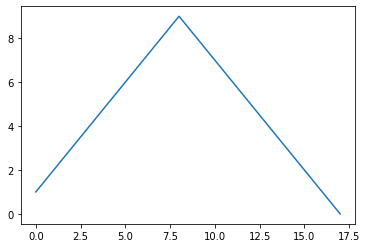

In [105]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [106]:
import numpy as np

t = np.arange(0,12,0.01)

y = np.sin(t)

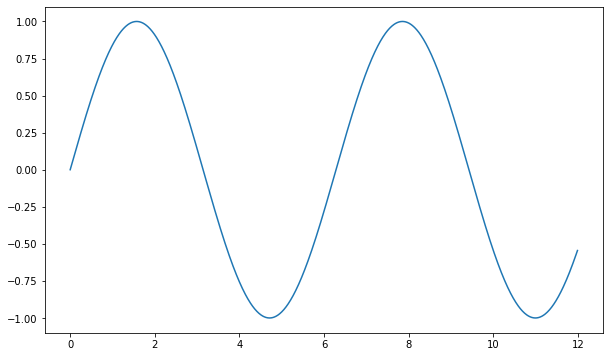

In [107]:
plt.figure(figsize=(10,6)) 
plt.plot(t, y)
plt.show()

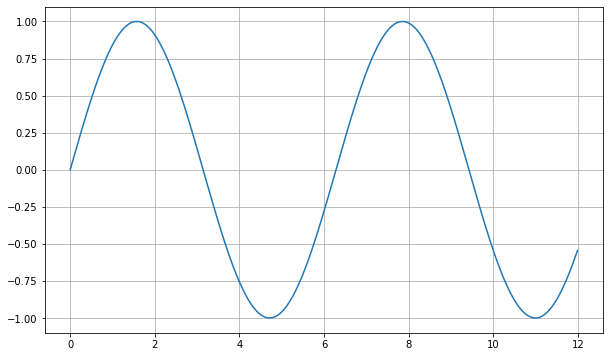

In [108]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid() # 그리드 적용하기
plt.show()

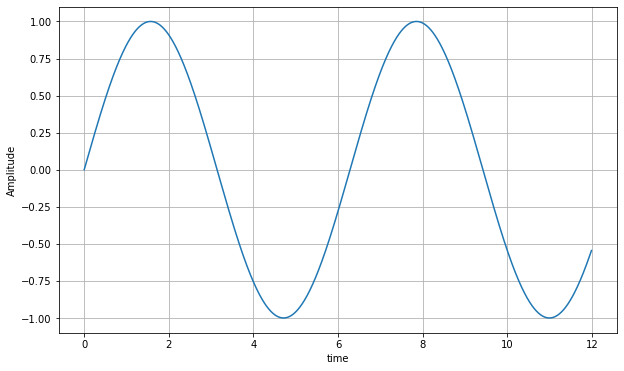

In [109]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')       # x축 라벨 적용하기
plt.ylabel('Amplitude')  # y축 라벨 적용하기
plt.show()

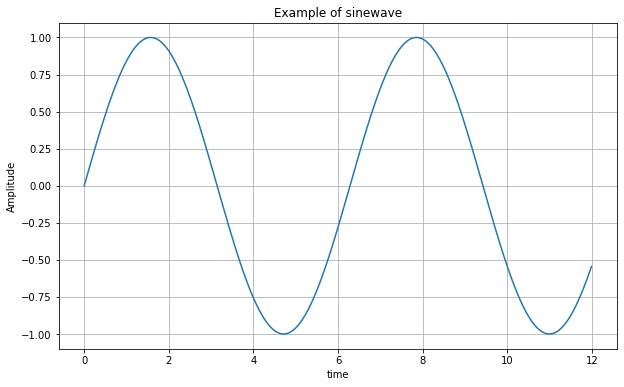

In [110]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

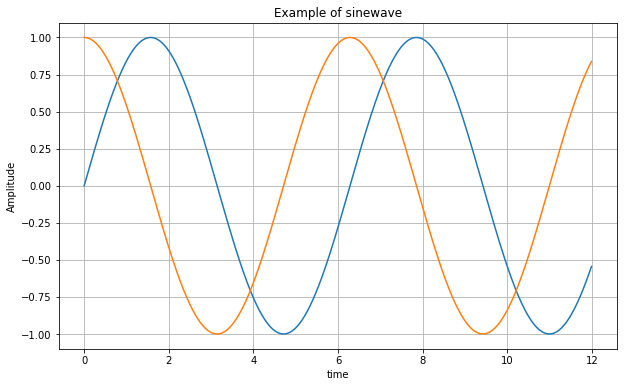

In [111]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

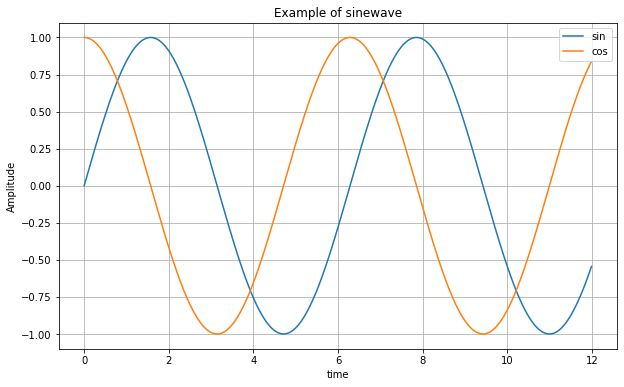

In [112]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

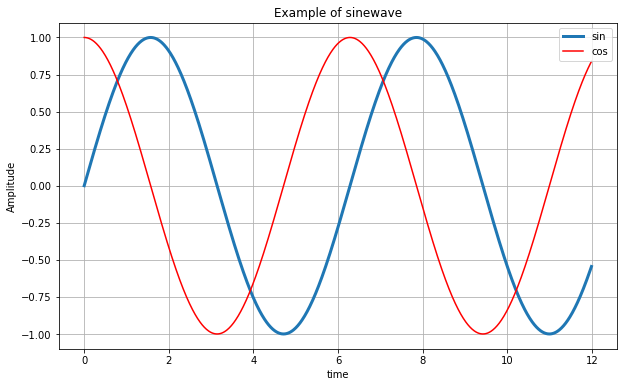

In [113]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

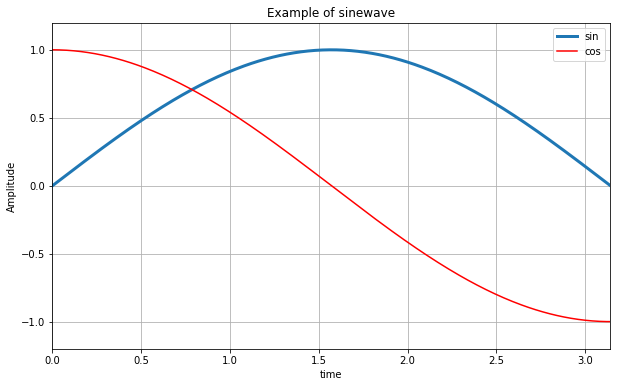

In [114]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin') # lw : line width
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)
plt.show()

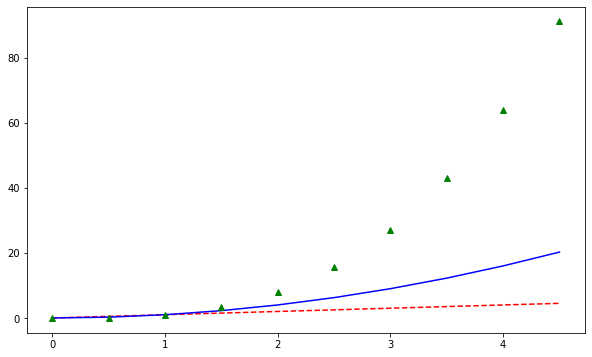

In [115]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'b')
plt.plot(t, t**3, 'g^')
plt.show()

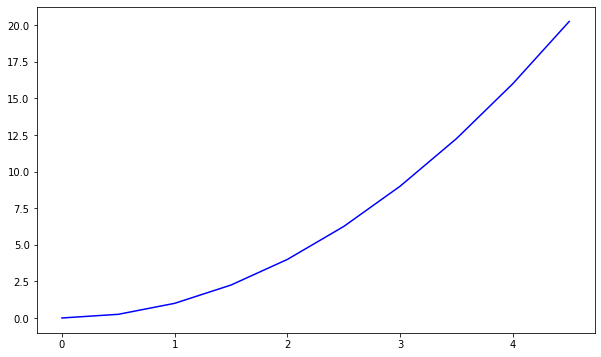

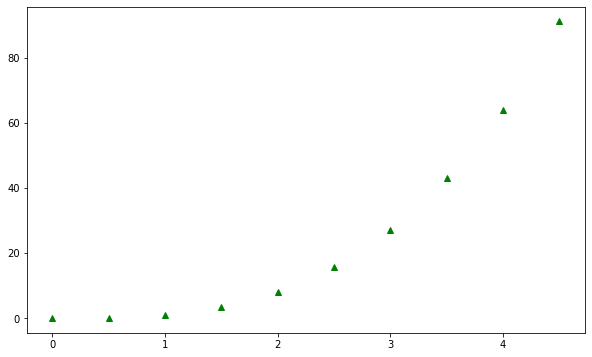

In [116]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
pl1 = plt.plot(t, t**2, 'b')

plt.figure(figsize=(10,6))
pl2 = plt.plot(t, t**3, 'g^')

plt.show()

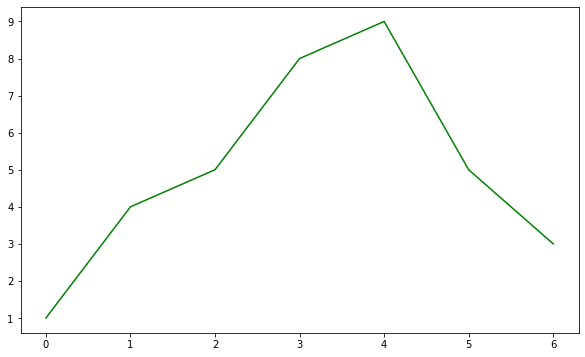

In [117]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

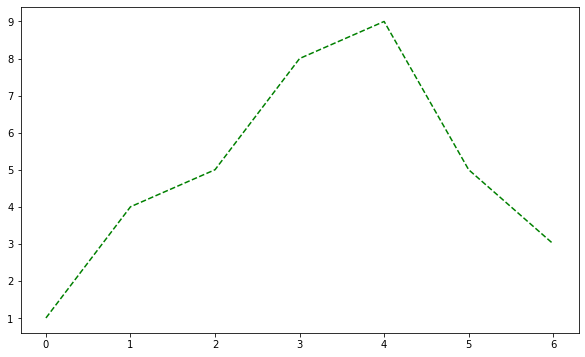

In [118]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

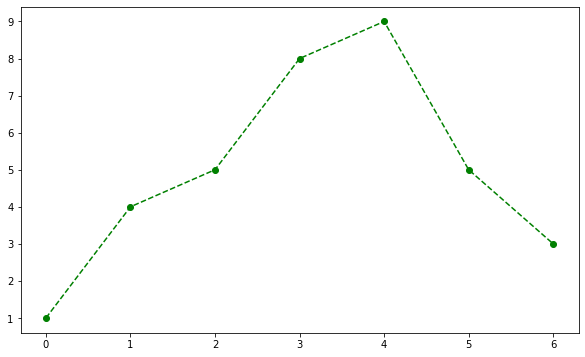

In [119]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

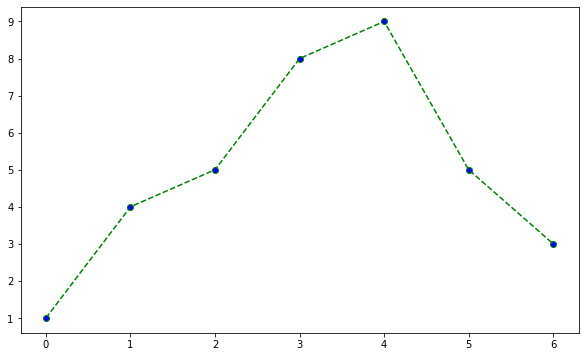

In [120]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue')
plt.show()

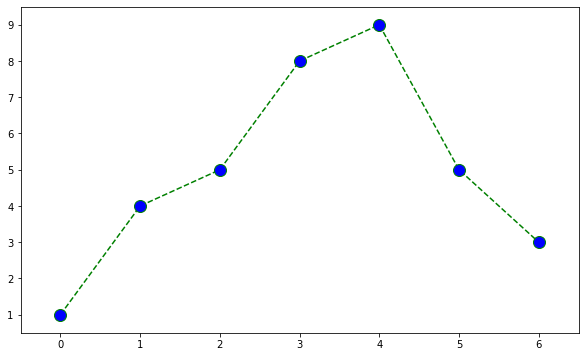

In [121]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12)

plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [122]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

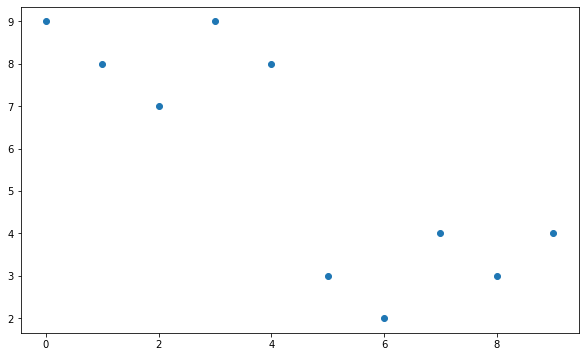

In [124]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

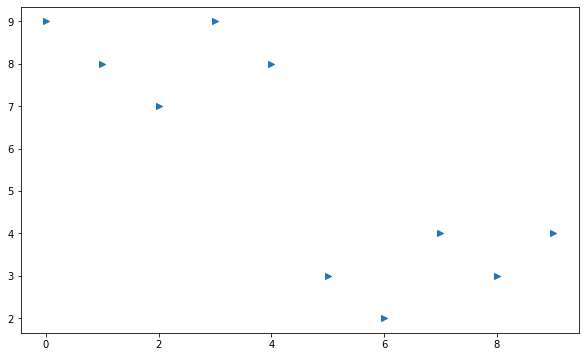

In [123]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

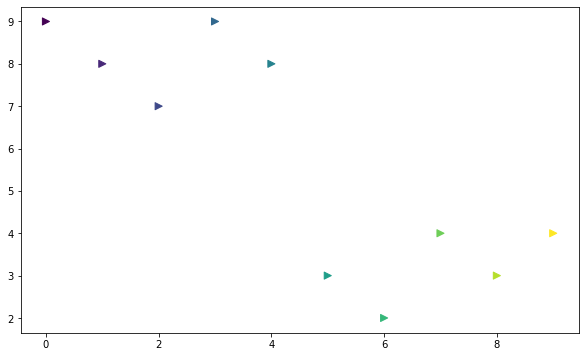

In [125]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.show()

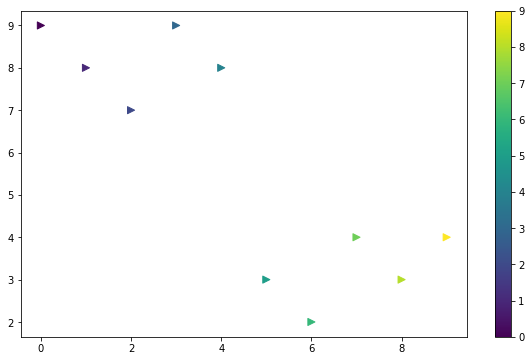

In [126]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar() # colormap = t 기준
plt.show()

In [127]:
s1 = np.random.normal(loc=0, scale=1, size=1000) # loc : 평균, scale: 분산
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

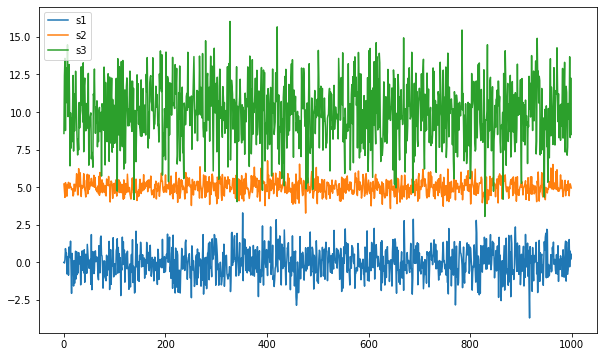

In [128]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

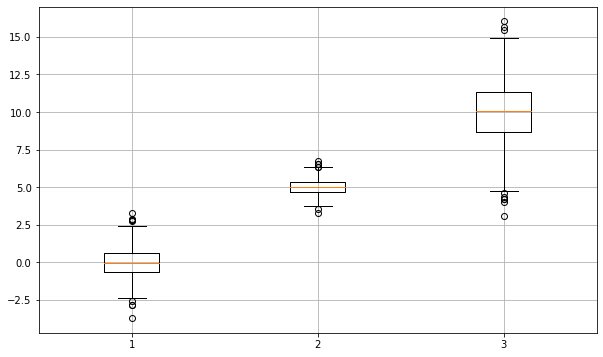

In [129]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

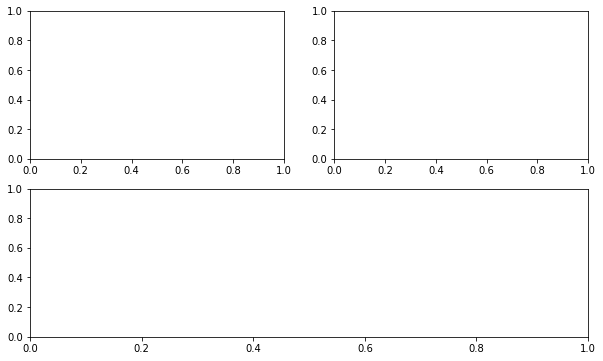

In [130]:
plt.figure(figsize=(10,6))

plt.subplot(221)  # 캔버스 전체를 2행 2열로 보고 1번째 
plt.subplot(222)  # 캔버스 전체를 2행 2열로 보고 2번째 
plt.subplot(212)  # 캔버스 전체를 2행 1열로 보고 2번째

plt.show()

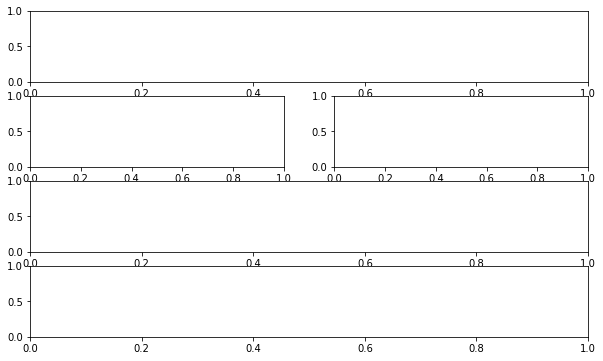

In [131]:
plt.figure(figsize=(10,6))

plt.subplot(411) # 캔버스 전체를 4행 1열로 보고 1번째
plt.subplot(423) # 캔버스 전체를 4행 2열로 보고 3번째 
plt.subplot(424) # 캔버스 전체를 4행 2열로 보고 4번째
plt.subplot(413) # 캔버스 전체를 4행 1열로 보고 3번째
plt.subplot(414) # 캔버스 전체를 4행 1열로 보고 4번째

plt.show()

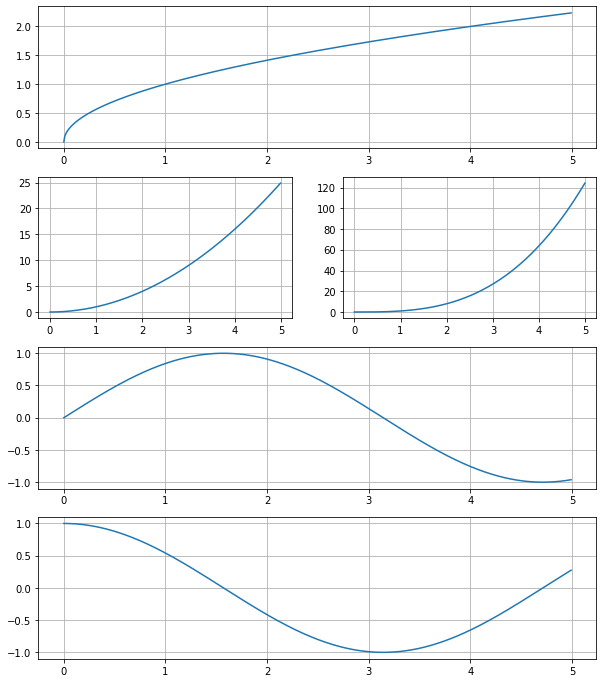

In [132]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

# 9. CCTV와 인구현황 그래프로 분석하기

In [ ]:
# jupyter notebook에서 사용할 것
# 현재 본인의 컴퓨터 os 환경 확인 후 설치 

#!sudo apt-feft install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/cache/matplotlib -rf


sudo: apt-feft: command not found
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [133]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
#import matplotlib
#matplotlib.matplotlib_fname()

'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc'

In [134]:
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1715,110.429448,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
용산구,2611,7579.411765,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
성동구,3829,2249.079755,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
광진구,3211,9074.285714,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
동대문구,2628,65600.000000,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [135]:
data_result['총계']

구별
종로구     1715
용산구     2611
성동구     3829
광진구     3211
동대문구    2628
중랑구     3737
성북구     4602
강북구     3090
도봉구     1930
노원구     2492
은평구     4131
서대문구    3055
마포구     2496
양천구     3650
강서구     2744
구로구     4608
금천구     2411
영등포구    4056
동작구     2306
관악구     5149
서초구     4082
강남구     6871
송파구     2897
강동구     2809
Name: 총계, dtype: int64

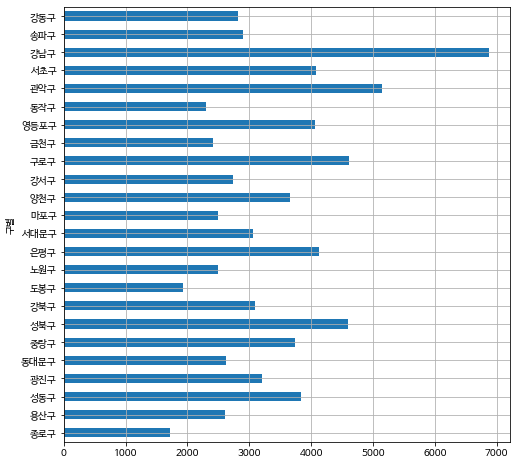

In [139]:
plt.figure()
data_result['총계'].plot(kind='barh', grid=True, figsize=(8,8))
#data_result['총계'].plot(kind='barh')
plt.show()

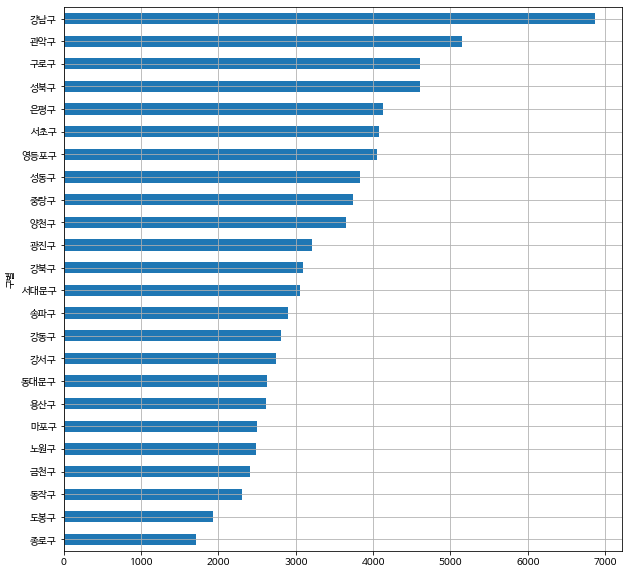

In [140]:
data_result['총계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.show()

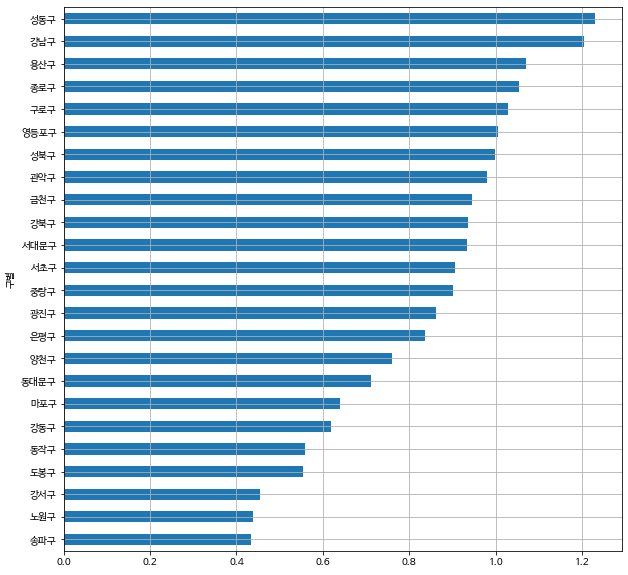

In [141]:
data_result['CCTV비율'] = data_result['총계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

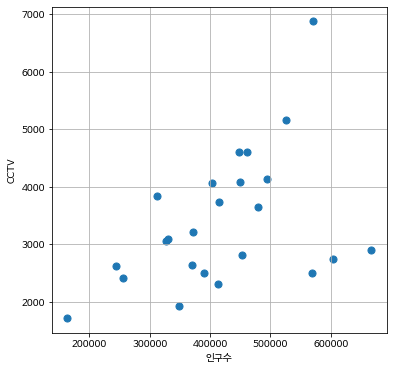

In [143]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['총계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 10. 조금더 설득력 있는 자료 만들기

In [152]:
fp1 = np.polyfit(data_result['인구수'], data_result['총계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['총계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,6871,9857.971014,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1.204382,2846.074000
송파구,2897,7142.500000,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.434019,1541.995776
노원구,2492,249200.000000,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.437666,1528.161228
강서구,2744,4981.481481,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.454476,1422.981098
관악구,5149,1070.227273,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.979801,1316.137856


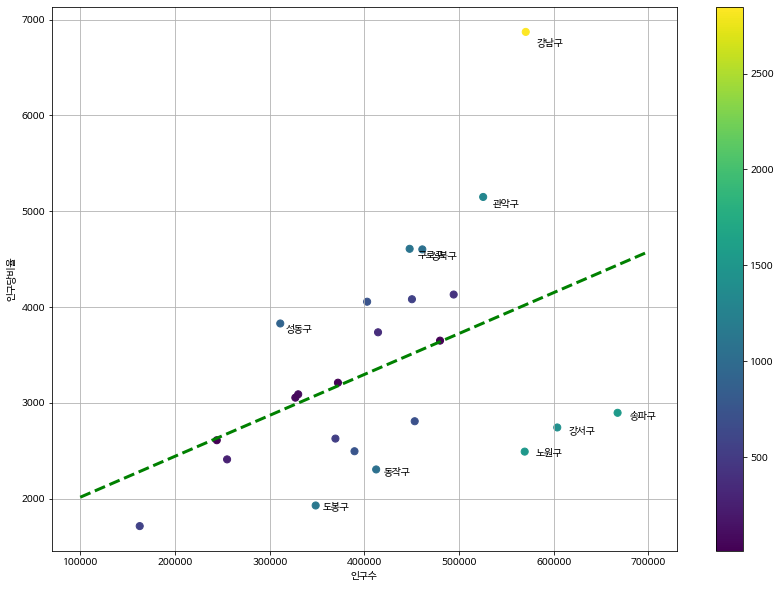

In [153]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['총계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') #ls : line style

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['총계'][n]*0.98, 
             df_sort.index[n], fontsize=10)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 관악구, 구로구, 성북구는 CCTV가 많지만,
* 송파구, 강서구, 노원구, 도봉구, 동작구는 다른 구에 비해 CCTV 비율이 낮다.